### 1.	Import relevant libraries

In [620]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

### 2.	Upload Titanic Train Data set Shared

In [621]:
df = pd.read_csv("Titanic_train.csv")

### 3.	Identify all the columns of the data set

In [622]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 4.	Find out total number of passengers for each class

In [623]:
df["Pclass"].value_counts(ascending=True)

2    184
1    216
3    491
Name: Pclass, dtype: int64

### 5.	Plot a count plot for each class of survived attribute

<Axes: xlabel='Survived', ylabel='count'>

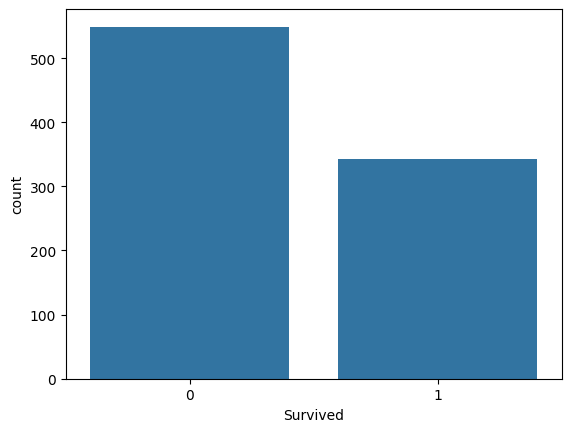

In [624]:
sns.countplot(x="Survived", data=df)

### 6.	Plot a count plot to identify number of female and male passengers that survived or died

<Axes: xlabel='Sex', ylabel='count'>

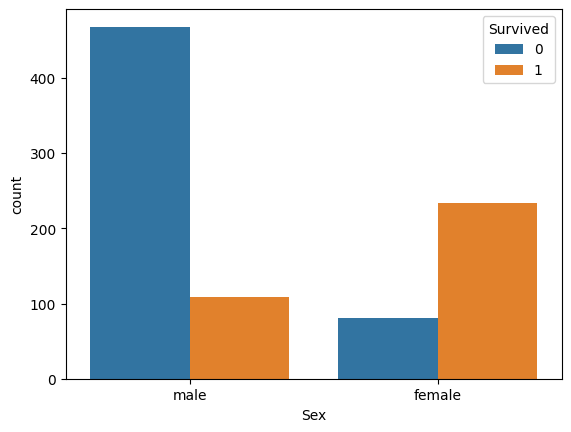

In [625]:
sns.countplot(x="Sex", hue="Survived", data=df)

### 7.	Plot a count plot to identify number of passengers survived or died that were travelling through Pclass 1, 2, and 3.

<Axes: xlabel='Survived', ylabel='count'>

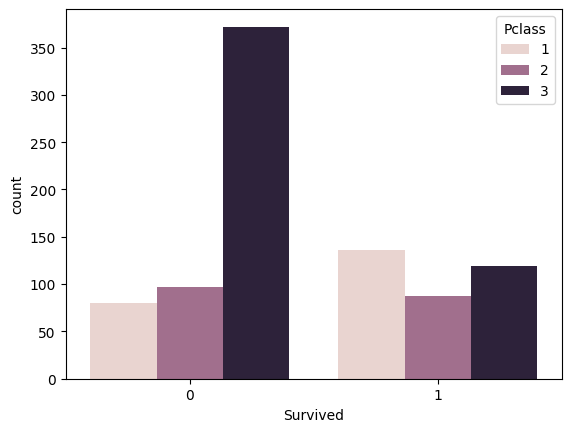

In [626]:
sns.countplot(x="Survived", hue="Pclass", data=df)

### 8.	Find out total missing values in the dataset

In [627]:
print(df.isnull().sum())
print(f'total missing values: {df.isnull().sum().sum()}')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
total missing values: 866


### 9. Apply missing value treatment by replacing missing values with mean, mode or dropping column depending upon type of variable

In [628]:
# drop cabin
df.drop("Cabin", axis=1, inplace=True)

In [629]:
# mean of age
def add_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
      return int(df[df["Pclass"]==Pclass]["Age"].mean())
    else:
      return Age

In [630]:
df["Age"] = df[["Age", "Pclass"]].apply(add_age, axis=1)

In [631]:
# mode of embarked
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [632]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### 10.	Create a new feature “Family” that combiner SibSp and Parch

In [633]:
def combine(df, col1, col2):
  df["Family"]=df[col1]+df[col2]
  df.drop([col1, col2], inplace=True, axis=1)
  return df

In [634]:
df = combine(df, "SibSp", "Parch")

### 11.	Convert age to a categorical variable

In [635]:
def categorize_age(age):
  if pd.isnull(age):
    return "Missing"
  elif age>0 and age<=5:
    return "Infant"
  elif age>5 and age<=12:
    return "Child"
  elif age>12 and age<=18:
    return "Teenager"
  elif age>18 and age<=35:
    return "Young adult"
  elif age>35 and age<=60:
    return "Adult"
  else:
    return "Senior"

In [636]:
df["Age_Category"] = df["Age"].apply(categorize_age)

In [637]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,Young adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,Young adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,Young adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,Young adult


In [638]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
Ticket           object
Fare            float64
Embarked         object
Family            int64
Age_Category     object
dtype: object

### 12.	Apply one hot encoding on categorical column like "Pclass","Sex","Age_Category","Embarked"

In [639]:
def encode(df,col_name):
  dummies = pd.get_dummies(df[col_name], prefix=col_name)
  return pd.concat([df, dummies], axis=1)

In [640]:
for column in ["Pclass","Sex","Age_Category","Embarked"]:
  df=encode(df,column)

### 13.	Drop unnecessary columns like 'Name','Age','Sex','Ticket','Pclass','Age_Category','Embarked'

In [641]:
df = df.drop(columns=['Name','Age','Sex','Ticket','Pclass','Age_Category','Embarked'], axis=1)

### 14.	Fit Logistic Regression Model

In [642]:
model = LogisticRegression()

x = df.loc[:, df.columns!="Survived"]
y = df["Survived"]

model.fit(x, y)
y_pred = model.predict(x)
accuracy = accuracy_score(y, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 15.	Identify the accuracy and print classification report. State your inference

In [643]:
print(f"accuracy = {accuracy}")
print(f"classification report ~ \n{classification_report(y, y_pred)}")

accuracy = 0.819304152637486
classification report ~ 
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       549
           1       0.79      0.72      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891



### 16.	Split dataset into train and validation. Create a new model on train data set. Predict class for validation data set. Find the accuracy and print classification report. State your inference

In [644]:
# do yourself, note - split train into 80-20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model2 = LogisticRegression()

model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [645]:
print(f"accuracy = {accuracy}")
print(f"classification report ~ \n{classification_report(y_test, y_pred)}")

accuracy = 0.7486033519553073
classification report ~ 
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       111
           1       0.69      0.62      0.65        68

    accuracy                           0.75       179
   macro avg       0.73      0.72      0.73       179
weighted avg       0.75      0.75      0.75       179



INFERENCE -
- After splitting the dataset into train and test, the accuracy of the model reduced to 79.3%.
- The precision for predicting 1's also reduced from 0.79 to 0.75.

### 17.	Plot ROC curve for the model created in task 16. State your inference

In [646]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [647]:
# to calculate auc score
auc = roc_auc_score(y_test, y_pred)

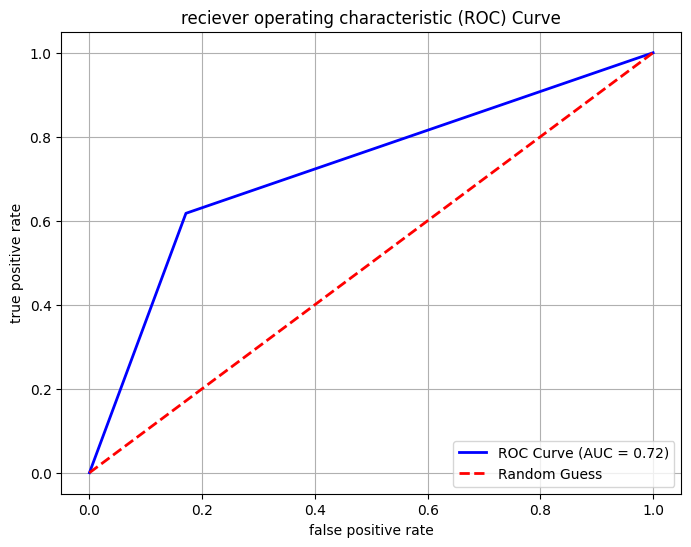

In [648]:
# to plot roc curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('reciever operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

INFERENCE -
- Since the ROC Curve is above random guessing line and AUC is greater than 0.7, the model is good and can be used.

### 18.	Apply above steps for Titanic Test data set. Compare accuracy of test and validation data set. Compare ROC curve.

In [649]:
# upload
data = pd.read_csv("Titanic_test.csv")

In [650]:
data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [651]:
# to find total no of passengers of each class
data["Pclass"].value_counts(ascending=True)

2     93
1    107
3    218
Name: Pclass, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

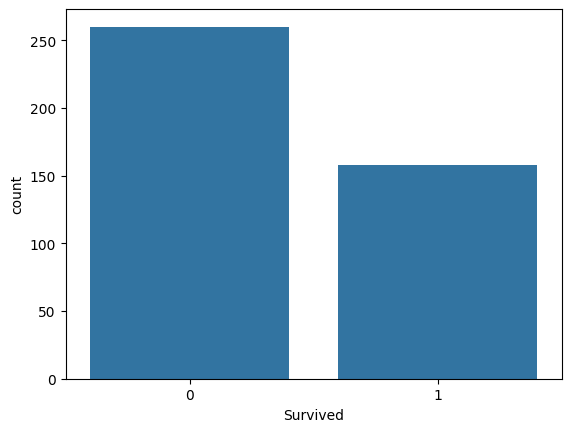

In [652]:
# countplot for each class of survived attribute
sns.countplot(data, x="Survived")

<Axes: xlabel='Sex', ylabel='count'>

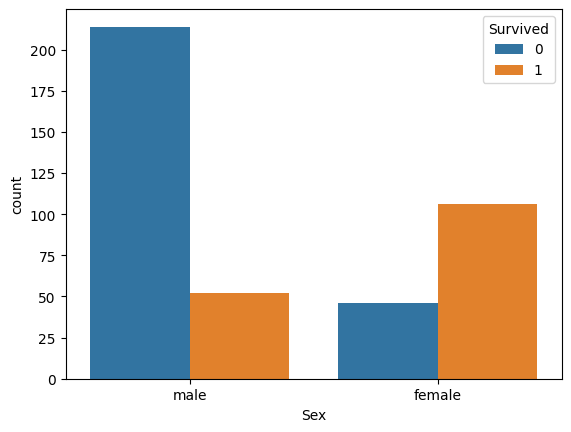

In [653]:
# countplot to identify no of female and male passengers that survived or died
sns.countplot(data, x="Sex", hue="Survived")

<Axes: xlabel='Survived', ylabel='count'>

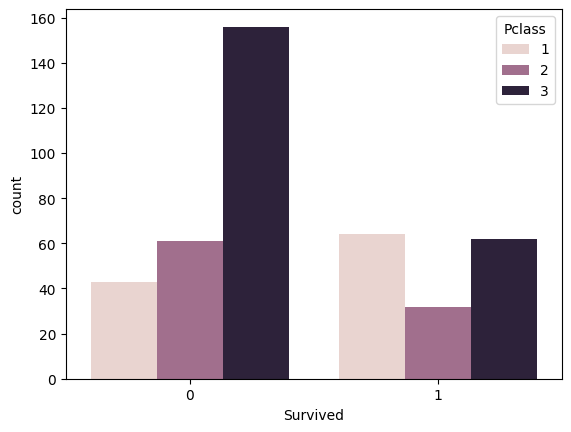

In [654]:
# countplot to identify number of passengers survived or died that were travelling through Pclass 1, 2, and 3
sns.countplot(data, x="Survived", hue="Pclass")

In [655]:
# total missing values in the dataset
print(data.isnull().sum())
print(f"Total Missing Values: {data.isnull().sum().sum()}")

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64
Total Missing Values: 414


####	Apply missing value treatment by replacing missing values with mean, mode or dropping column depending upon type of variable

In [656]:
# drop cabin
data.drop("Cabin", axis=1, inplace=True)

In [657]:
# mean of age
def add_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    return int(data[data["Pclass"] == Pclass]["Age"].mean())
  else:
    return Age

In [658]:
data["Age"] = data[["Age", "Pclass"]].apply(add_age, axis=1)

In [659]:
# mode of embarked
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

In [660]:
# to drop column with NaN in Fare
data = data[data["Fare"].notna()]

In [661]:
#	to create new feature Family that combiner SibSp and Parch
data["Family"] = data["SibSp"] + data["Parch"]

data.drop(["SibSp", "Parch"], axis=1, inplace=True)

<ipython-input-661-4ce430d5ce50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Family"] = data["SibSp"] + data["Parch"]
<ipython-input-661-4ce430d5ce50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(["SibSp", "Parch"], axis=1, inplace=True)


In [662]:
# to convert age to categorical variable
def categorize_age(Age):
  if Age <= 5:
    return "Infant"
  elif Age <= 12:
    return "Child"
  elif Age <= 18:
    return "Teenager"
  elif Age <= 35:
    return "Young Adult"
  elif Age <= 60:
    return "Adult"
  else:
    return "Senior"

data["Age_Category"] = data["Age"].apply(categorize_age)

<ipython-input-662-aee838279ac9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age_Category"] = data["Age"].apply(categorize_age)


In [663]:
# one hot encoding on categorical column like "Pclass","Sex","Age_Category","Embarked
data = pd.get_dummies(data, columns=["Pclass", "Sex", "Age_Category", "Embarked"])

In [664]:
# to drop unnecessary columns like 'Name','Age','Ticket'
data.drop(["Name", "Age", "Ticket"], axis=1, inplace=True)

####	Fit Logistic Regression Model

In [665]:
x = data.loc[:, data.columns != "Survived"]
y = data["Survived"]

model.fit(x, y)
y_pred = model.predict(x)
accuracy = accuracy_score(y, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [666]:
print(f"accuracy = {accuracy}")
print(f"classification report ~ \n{classification_report(y, y_pred)}")

accuracy = 0.7745803357314148
classification report ~ 
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       259
           1       0.74      0.63      0.68       158

    accuracy                           0.77       417
   macro avg       0.77      0.75      0.75       417
weighted avg       0.77      0.77      0.77       417



####	Plot ROC curve for the model created in task 16. State your inference

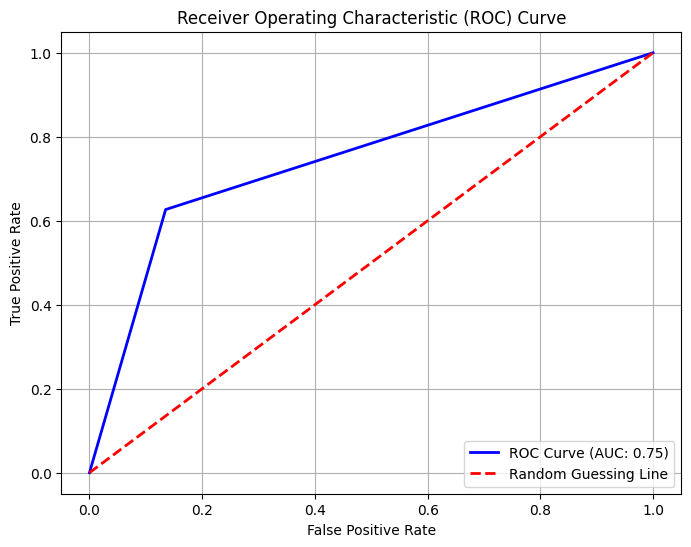

In [667]:
fpr, tpr, thresholds = roc_curve(y, y_pred)

auc = roc_auc_score(y, y_pred)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC: {auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--", label="Random Guessing Line")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

INFERENCE -
- Since the ROC Curve is above random guessing line and AUC is greater than 0.7, the model is good and can be used.

####	Identify the accuracy and print classification report. State your inference

In [668]:
print(f"Accuracy: {accuracy}")
print(f"Classification Report: \n{classification_report(y, y_pred)}")

Accuracy: 0.7745803357314148
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       259
           1       0.74      0.63      0.68       158

    accuracy                           0.77       417
   macro avg       0.77      0.75      0.75       417
weighted avg       0.77      0.77      0.77       417



INFERENCE -
- The accuracy is lower than task 16.|